In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
l = pd.read_csv(r'C:\Users\SAMYA PUNTIKURA\Downloads\movie_data\links.csv')
t = pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data\tags.csv")
m = pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data\movies.csv")
r = pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data\ratings.csv")

### 1)What is the shape of "movies.csv"?


In [4]:
m.shape

(9742, 3)

### 2)What is the shape of "ratings.csv"?

In [5]:
r.shape

(100836, 4)

### 3)How many unique "userId" are available in "ratings.csv"?

In [10]:
r['userId'].nunique()

610

### 4)Which movie has recieved maximum number of user ratings?

In [7]:
val_count = r['movieId'].value_counts()
id_max = val_count.idxmax()
max_rm = m[m['movieId'] == id_max ]['title']
max_rm

314    Forrest Gump (1994)
Name: title, dtype: object

### 5)Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [8]:
m[m['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [9]:
t[t['movieId']==2571]['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

### 6)What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [11]:
m[m['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [16]:
df_term = r[r['movieId']==589]['rating'].mean()

In [18]:
df_term

3.970982142857143

### 7)How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

In [19]:
m[m['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [20]:
df_fc=r[r['movieId']==2959]

C:\Users\SAMYA PUNTIKURA\AppData\Local\Temp\ipykernel_16640\611164753.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_fc,x=df_fc['rating'],shade=True)


<AxesSubplot:xlabel='rating', ylabel='Density'>

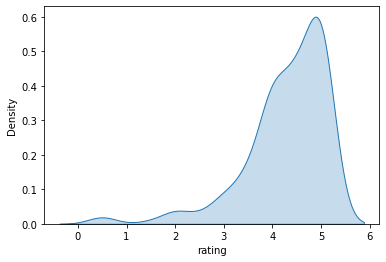

In [21]:
sns.kdeplot(data=df_fc,x=df_fc['rating'],shade=True)

In [22]:
df_mr=r.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [23]:
df_m_r = pd.merge(m,df_mr,on='movieId',how='inner')

In [24]:
df_m_r = df_m_r[df_m_r['count']>50]

### Which movie is the most popular based on  average user ratings?


In [25]:
df_m_r['mean'].max()

4.429022082018927

In [26]:
df_m_r[df_m_r['mean']==4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [27]:
df_m_r.sort_values(by='count',ascending=False).head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [28]:
df_scfi = df_m_r[df_m_r['genres'].str.contains('Sci-Fi')]

In [29]:
df_scfi.sort_values(by='count',ascending=False).head()

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [30]:
import requests
import numpy as np
from bs4 import BeautifulSoup

In [31]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [32]:
imdb = pd.merge(df_m_r,l,on='movieId')

In [ ]:
imdb['imdbRatings'] = imdb['imdbId'].apply(scrapper)

In [ ]:
imdb

### Mention the movieId of the movie which has the highest IMDB rating.


In [124]:
imdb.sort_values(by='imdbRatings',ascending=False).head(1)

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [126]:
imdb_sc = imdb[imdb['genres'].str.contains('Sci-Fi')]

In [128]:
imdb_sc.sort_values(by='imdbRatings',ascending=False).iloc[0]

movieId                                                  79132
title                                         Inception (2010)
genres         Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
count                                                      143
mean                                                  4.066434
imdbId                                                 1375666
tmdbId                                                 27205.0
imdbRatings                                                8.8
Name: 424, dtype: object